# Conjunto de Prueba

## **Objetivo :**

* Consolidar un conjunto de prueba con caracteristicas similares, al problema de agrupación de textos cortos del proyecto de investigación para identificar temas latentes.

####  Organizando datos de prueba

In [4]:
# # Librerias
import sys, pickle
sys.path.insert(0, "../Src")
import pandas as pd
import numpy as np
import nltk, collections, re, string, scipy, gc, os
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from searchScopus import scopusResult, searchScopus, searchSciense, buscarList, orgDocum
from comDTR import DTR, makeTFidf, parsetexts, hisTFidf, makeWord2Vec
from scipy import sparse
from gensim.models.word2vec import Word2Vec
from nltk.stem.porter import PorterStemmer

## Descarga de información Scopus

In [ ]:
# # Definir directorios
outPath    = '../Output/'
fileBackup = outPath + 'query_data_sc_RE.spkl'
file_tradu = outPath + 'datosFinal_RE.pkl'
indexQuery = pickle.load(open(outPath + 'indexQyery_RE.pkl', 'rb'))
datUN      = pickle.load(open(file_tradu, 'rb'))

# # Articulos por titulos Base de datos keyworks
resulArK = buscarList(listQuery = indexQuery, 
                      basePath = "../scopus-data", flagKEY = True, fileOut = fileBackup)
resulArK = orgDocum(resulArK, indexQuery)

---- Consultas en scopus para:
    listQuery = <type 'collections.defaultdict'>
    basePath = ../scopus-data
    flagKEY = True
    fileOut = ../Output/query_data_sc_RE.spkl
    verbose = True
    flagALL = True
    Largo =3290
---------------------------
query No --100--
query No --200--
query No --300--
query No --400--
query No --500--
query No --600--
query No --700--
query No --800--
query No --900--
query No --1000--
query No --1100--
query No --1200--
query No --1300--
query No --1400--
query No --1500--
query No --1600--
query No --1700--
query No --1800--
query No --1900--
query No --2000--
query No --2100--
query No --2200--
query No --2300--
query No --2400--
query No --2500--
query No --2600--
query No --2700--
query No --2800--
query No --2900--
query No --3000--
query No --3100--
query No --3200--

In [ ]:
%matplotlib inline
from __future__ import division
from itertools import *
from pylab import *
from nltk.corpus import brown
from string import lower
from collections import Counter


# The data: token counts from the Brown corpus
#tokens_with_count = Counter(imap(lower, brown.words()))
tokens_with_count = Counter(prueba.vocabulary)
counts = array(tokens_with_count.values())
tokens = tokens_with_count.keys()

# A Zipf plot
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
ax = plot(ranks, frequencies, marker=".")
ax.set_yscale('log')

title("Zipf plot for Brown corpus tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
#for n in list(logspace(-0.5, log10(len(counts)), 20).astype(int)):
#    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
#                 verticalalignment="bottom",
#                 horizontalalignment="left")

show()

## Distributional terms representation DTR and Cluster (DBUNAL)

In [18]:
# # Lectura de resultados (Omega_res)
datUN = pickle.load(open(outPath + 'datosFinal_RE.pkl', 'rb')) 
indUN = np.unique(datUN[datUN['IND_PROYECTO'] != 0].loc[:, 'Indice_Busqueda']) # Indices

# # Lectura del indice con textos originales
fileIndex = outPath + "indexQyery_RE.pkl"
if os.path.exists(fileIndex): 
    indexQuery = pickle.load(open(fileIndex, 'rb'))
sin_puntuacion = [indexQuery[ww] for ww in indUN]
listDupli      = np.unique([re.sub("\s", "", ww) for ww in sin_puntuacion], return_index = True)
sin_duplicados = np.array(sin_puntuacion)[np.array(listDupli[1])]
sin_duplicados = sin_duplicados[np.where(sin_duplicados != u'')]

def stemText(text):
    return ' '.join([PorterStemmer().stem(word) for word in text.split()])
sin_duplicados = [stemText(ww) for ww in sin_duplicados]

# # Calculando DTR
import os 
if os.path.exists('ResultsUN/DTR_key.pickle'):
    prueba = pickle.load(open('ResultsUN/DTR_key.pickle', 'rb'))
    print("--- Load stemming and tokenization\n")
    print(prueba.TCOR.asformat)
    print(prueba.WDOR.asformat)   
else:
    prueba = DTR(listDocs = resulArK.loc[:, "Abstract"], titleOri = sin_duplicados, abrevFile = "key")
    pickle.dump(prueba, open('ResultsUN/DTR_key.pickle', 'wb'))

--- Load stemming and tokenization

<bound method csr_matrix.asformat of <2138x103174 sparse matrix of type '<type 'numpy.float64'>'
	with 112349296 stored elements in Compressed Sparse Row format>>
<bound method csr_matrix.asformat of <2138x24945 sparse matrix of type '<type 'numpy.float64'>'
	with 20415117 stored elements in Compressed Sparse Row format>>


In [22]:
prueba.A

<24945x103174 sparse matrix of type '<type 'numpy.int64'>'
	with 1972009 stored elements in Compressed Sparse Row format>

In [20]:
prueba.vocabularya

{u'fawn': 29670,
 u'\u201cbuonaparte\u201d': 102439,
 u'circuitri': 14886,
 u'rationality\u2014that': 75848,
 u'woodi': 99892,
 u'oec': 63245,
 u'degussa': 21058,
 u'inifap': 42592,
 u'bouvino': 10066,
 u'intrahousehold': 43588,
 u'mdbs': 52841,
 u'pathplan': 66714,
 u'dualstimuli': 24475,
 u'gavag': 33599,
 u'devicebas': 21878,
 u'formingdiffus': 31810,
 u'viabli': 97342,
 u'gac': 33116,
 u'centralgovern': 13311,
 u'hottingerinaformi': 39486,
 u'nauseavomit': 58964,
 u'accret': 417,
 u'malefemal': 51554,
 u'crossbar': 18753,
 u'antcaterpillar': 3838,
 u'airfuel': 1953,
 u'doubleprecis': 23843,
 u'noncontamin': 61017,
 u'biogasif': 8787,
 u'pigment': 69248,
 u'practicessolut': 71787,
 u'dhacommon': 22006,
 u'energyplan': 26859,
 u'underintegr': 95279,
 u'pseudosecond': 73784,
 u'barotopr': 7237,
 u'rainspel': 75587,
 u'wooden': 99888,
 u'showcas': 82951,
 u'tcbs': 89859,
 u'multiorgan': 57536,
 u'wednesday': 98890,
 u'sericit': 82158,
 u'ysalp': 100922,
 u'windthrow': 99594,
 u'onefour

In [8]:
# # Calculando DF
print(pd.DataFrame({'DF' : np.array(prueba.nt)[0] / float(len(resulArK.loc[:, "Abstract"])), 
              'N_t': np.array(prueba.nt)[0]}).describe())
listaOrden = sorted(prueba.vocabulary, key=prueba.vocabulary.__getitem__)
elimDerecha = [listaOrden[ww] for ww in np.where(np.array(prueba.nt)[0] / float(len(resulArK.loc[:, "Abstract"])) > 0.07)[0]]
print(len(elimDerecha))
print(len([listaOrden[ww] for ww in np.where(np.array(prueba.nt)[0] / float(len(resulArK.loc[:, "Abstract"])) <= 0.07)[0]]))

                  DF            N_t
count  103174.000000  103174.000000
mean        0.000766      19.113430
std         0.007090     176.857114
min         0.000040       1.000000
25%         0.000040       1.000000
50%         0.000040       1.000000
75%         0.000080       2.000000
max         0.573822   14314.000000
221
102953


In [9]:
print(elimDerecha)

[u'achiev', u'activ', u'addit', u'affect', u'age', u'aim', u'allow', u'analys', u'analysi', u'analyz', u'appli', u'applic', u'approach', u'area', u'articl', u'assess', u'associ', u'avail', u'background', u'base', u'better', u'bv', u'case', u'caus', u'challeng', u'chang', u'character', u'characterist', u'clinic', u'collect', u'combin', u'common', u'compar', u'complex', u'concentr', u'conclus', u'condit', u'conduct', u'consid', u'consist', u'content', u'contribut', u'control', u'current', u'data', u'decreas', u'demonstr', u'describ', u'design', u'detect', u'determin', u'develop', u'differ', u'direct', u'discuss', u'distribut', u'educ', u'effect', u'effici', u'elsevi', u'energi', u'enhanc', u'environ', u'environment', u'establish', u'estim', u'evalu', u'examin', u'exist', u'experi', u'experiment', u'explor', u'factor', u'field', u'final', u'focus', u'follow', u'form', u'function', u'futur', u'general', u'generat', u'group', u'health', u'high', u'higher', u'howev', u'human', u'identifi', u

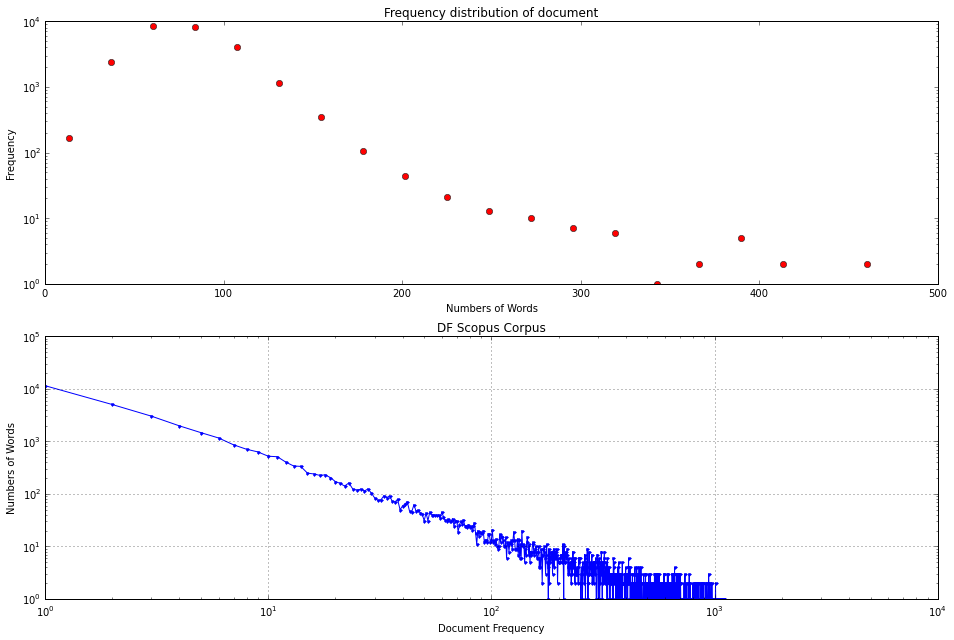

In [10]:
%matplotlib inline
from pylab import *
rcParams['figure.figsize'] = 16, 16
prueba.plotDF()

In [11]:
prueba.foundStrangeVoc()

IDF       IFM  Max_tf-IDF  N_t               texto
0     7.667626  5.337538    0.370861    1                 aab
1     7.667626  5.337538    0.286583    1                aact
2     7.667626  5.337538    0.390999    1          abaumannii
3     7.667626  5.337538    0.270491    1       ablongifolium
4     5.365041  3.077312    0.425073   10              aburra
5     7.667626  5.337538    0.496599    1        aburravalley
6     7.667626  5.337538    0.302152    1           acaricida
7     7.667626  5.337538    0.764607    1          accusatori
8     7.667626  5.337538    0.190136    1                acdo
9     7.667626  5.337538    0.386201    1  acetylcholinestera
10    7.667626  5.337538    0.260456    1             achagua
11    7.667626  5.337538    0.382741    1              achuri
12    7.667626  5.337538    0.442654    1       acompnamiento
13    6.974479  4.649187    0.233098    2       aconvocatoria
14    7.667626  5.337538    0.323611    1           acuantico
15    7.667626  5.337538    0.433158    1          acutifoliu
16    7.667626  5.337538    0.380512    1               acutu
17    7.667626  5.337538    0.352354    1          adaptadosa
18    7.667626  5.337538    0.332898    1       adecuacuacion
19    7.667626  5.337538    0.337053    1   adenilitranferasa
20    6.974479  4.649187    0.446939    2           adenoviru
21    7.667626  5.337538    0.318193    1             adentil
22    7.667626  5.337538    0.382188    1             aderson
23    7.667626  5.337538    0.337849    1               adipo
24    6.569014  4.248495    0.427281    3        adipocytokin
25    7.667626  5.337538    0.400513    1                adoa
26    7.667626  5.337538    0.307346    1               adrew
27    6.058188  3.747148    0.373035    5             adriana
28    7.667626  5.337538    0.315550    1           adsorcion
29    6.569014  4.248495    0.307563    3                advi
...        ...       ...         ...  ...                 ...
1485  7.667626  5.337538    0.306861    1              yanbal
1486  6.974479  4.649187    0.328030    2              yaneth
1487  5.721716  3.420066    0.401711    7               yanez
1488  7.667626  5.337538    0.307333    1             yaquiva
1489  6.974479  4.649187    0.344292    2              yazmin
1490  7.667626  5.337538    0.229225    1            ycortina
1491  5.588185  3.291196    0.292257    8               yesid
1492  7.667626  5.337538    0.402332    1          yestructur
1493  6.974479  4.649187    0.296682    2                  yl
1494  7.667626  5.337538    0.328720    1             yolanda
1495  6.569014  4.248495    0.430811    3              yolima
1496  7.667626  5.337538    0.328404    1              yotoco
1497  7.667626  5.337538    0.314765    1             yubarta
1498  5.470402  3.178054    0.395110    9               yucca
1499  6.974479  4.649187    0.361855    2               yuhup
1500  7.667626  5.337538    0.345207    1              yukuna
1501  7.667626  5.337538    0.419066    1                yuri
1502  7.667626  5.337538    0.307333    1                 yuw
1503  6.974479  4.649187    0.457589    2               zarat
1504  7.667626  5.337538    0.344002    1                zebu
1505  6.974479  4.649187    0.603099    2                zenu
1506  7.667626  5.337538    0.221958    1        zipavivienda
1507  7.667626  5.337538    0.299305    1                 zni
1508  7.667626  5.337538    0.328847    1               zombi
1509  7.667626  5.337538    0.380512    1         zoocriadero
1510  6.974479  4.649187    0.412395    2              zroxni
1511  7.667626  5.337538    0.525797    1              zuleta
1512  7.667626  5.337538    0.342946    1                zuli
1513  6.569014  4.248495    0.323926    3               zulma
1514  7.667626  5.337538    0.253089    1             zuluaga

[1515 rows x 5 columns]

In [5]:
24945 * 0.07

1746.15

                DF          N_t
count  5586.000000  5586.000000
mean      0.001955     4.179377
std       0.004872    10.416469
min       0.000468     1.000000
25%       0.000468     1.000000
50%       0.000468     1.000000
75%       0.001403     3.000000
max       0.096819   207.000000
Corte sugerido >: 0.01657
[u'activ', u'analysi', u'antioquia', u'applic', u'area', u'assess', u'associ', u'bogota', u'carlo', u'cell', u'charact', u'colombia', u'colombian', u'commun', u'condit', u'construct', u'control', u'cour', u'cultur', u'depart', u'design', u'determin', u'develop', u'dir', u'dynam', u'econom', u'educ', u'effect', u'environ', u'evalu', u'gener', u'group', u'health', u'identif', u'ii', u'impact', u'implement', u'industri', u'institut', u'intern', u'manag', u'maria', u'materi', u'medellin', u'medicin', u'model', u'monitor', u'municip', u'nation', u'network', u'new', u'oper', u'phase', u'plan', u'plant', u'polici', u'process', u'product', u'program', u'project', u'public', u'qualiti',

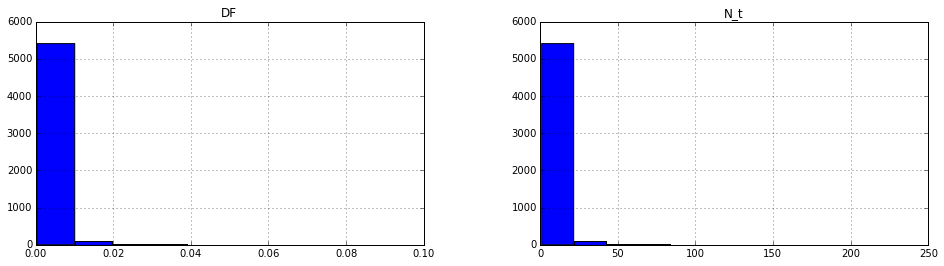

In [12]:
histOri = hisTFidf(prueba.fit_tfidfOri)
excludWord = [prueba.tfidfOri.get_feature_names()[ww] for ww in np.where(histOri.DF > 0.01657)[0]]
print(excludWord)

# # Recalculando DTR
prueba = DTR(listDocs = resulArK.loc[:, "Abstract"], titleOri = sin_duplicados, abrevFile = "key", 
             maxDF = 0.07, minDF = 0, maxDF_ori = 0.4, minDF_ori = 0.01657)
pickle.dump(prueba, open('ResultsUN/DTR_key_STOPS.pickle', 'wb'))

### Clustering TF-IDF

--- Load cosine similarity

--- Load cosine similarity



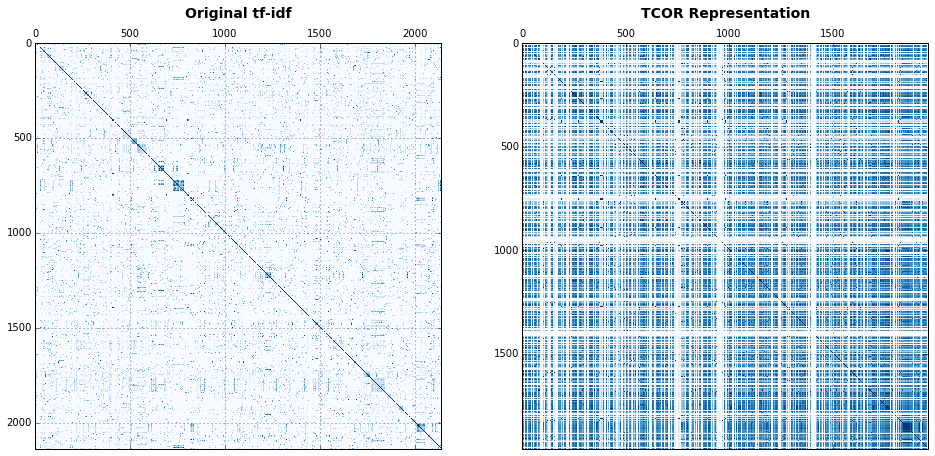

In [15]:
%matplotlib inline
from pylab import *
from cluster import *
prueba = pickle.load(open('ResultsUN/DTR_key_STOPS.pickle', 'rb'))
rcParams['figure.figsize'] = 16,12
cosine    = ComputeCosine(prueba.TCOR, "ResultsUN/cosinePrueba.pickle")
cosineOri = ComputeCosine(prueba.fit_tfidfOri, "ResultsUN/cosinePrueba_Key_tfidf.pickle")
showMatrix(cosineOri, cosine)

In [ ]:
print("si paso ?")

In [ ]:
print(prueba.fit_tfidfOri.asformat)
pp_tfidf = resulCluster(matrixSimilarity = cosineOri, DTR = prueba.fit_tfidfOri, num_cluster = range(3, 21), ntime = 10, 
                        fileCluster = 'ResultsUN/ClusterResul_Subjec_pp_tfidf.pickle')
rcParams['figure.figsize'] = 16, 5
plotResul(pp_tfidf, title = "Clustering Results tf-idf (Internal Evaluation)")
plotResul(pp_tfidf, title = "Clustering Results tf-idf (Internal Evaluation)", flagInternal = False)

<bound method csr_matrix.asformat of <2138x83 sparse matrix of type '<type 'numpy.float64'>'
	with 5779 stored elements in Compressed Sparse Row format>>
- evaluado para el metodo =  cluster_texts_spectral


### Clustering DTR

In [ ]:
print(prueba.TCOR.asformat)
pp_dtr = resulCluster(matrixSimilarity = cosine, DTR = prueba.TCOR, num_cluster = range(3, 21), ntime = 4, 
                      fileCluster = 'ResultsUN/ClusterResul_Key_DTR.pickle')
rcParams['figure.figsize'] = 16, 5
plotResul(pp_dtr, title = "Clustering Results tf-idf (Internal Evaluation)")
plotResul(pp_dtr, title = "Clustering Results tf-idf (Internal Evaluation)", flagInternal = False)

#### Explore number of query 

Uno de los parametros importantes en el desempeño de las representaciones distribucionales propuestas es el numero de documentos relevantes $M$ que son recuperados en la busqueda de Scopus, tambien se debe tener encuenta que existen algunos terminos que son muy frecuentes en la colección de documentos recuperados y que en la repreentación podrian sobreestimar de alguna manera la similitud de dos documentos, para esto se debe explorar el $DF$ maximo (frecuencia de documentos por sus siglas en ingles) y eliminar los terminos que son mayores a este punto de corte.

Para determinar estos parametros se explora el parametro $M$ en el conjunto $\Omega_{M} = \{5, 10, 15, 20, 30, 40, 50, 75, 100\}$, para cada uno de los parametros $M$ se explorar el punto de corte, tiniendo en cuenta la distribución de la frecuencia de documentos de los terminos a lo largo de la colección recuperada, con base en $\mu_{DF_{M}}$ y $\sigma_{DF_{M}}$, que son respectivamente la media y la desviación estandar de la frencia de documentos para la colección recuperada tomando $M$ documentos relevantes en la busuqeda, se construye el conjunto $\Omega_{DF_{M}} = \{\mu_{DF_{M}} + 3\sigma_{DF_{M}}, ...,  \max(DF_{M}) \}$, restringido a $|\Omega_{DF_{M}}| = 10$.

In [ ]:
from math import floor
resulTCOR, resulDOR = {}, {}
listQuey  = [5, 10, 15, 20, 30, 40, 50, 75, 100]
numCut    = [10, 10, 10, 10, 10, 10, 10, 10, 10]
allArK    = buscarList(listQuery = getIndexQuery(datKeyW, 'Titulos', "artKey_"), 
                       basePath = "../Scopus_DB/DB_keywords/", flagKEY = True, fileOut = "DB_Scopus_ART.spkl")
allResulK = collections.defaultdict()

for ii in range(len(listQuey)):
    nQuery, auxCut = listQuey[ii], numCut[ii]
    
    # # Articulos por titulos Base de datos keyworks
    resulArK  = orgDocum(allArK, getIndexQuery(datKeyW, 'Titulos', "artKey_"), numResul = nQuery)
    repDTR    = DTR(listDocs = resulArK.loc[:, "Abstract"], titleOri = datKeyW.loc[:, "Titulos"], abrevFile = "key")
    auxDF     = pd.DataFrame(np.array(repDTR.nt)[0] / float(len(resulArK.loc[:, "Abstract"]))).describe()
    auxStep   = (auxDF.loc['max', 0] - (auxDF.loc['mean', 0] + 3 * auxDF.loc['std', 0])) / auxCut
    listMaxDF = np.arange(auxDF.loc['mean', 0] + 3 * auxDF.loc['std', 0], auxDF.loc['max', 0], auxStep)
    auxSigma  = [(ww - auxDF.loc['mean', 0]) / auxDF.loc['std', 0] for ww in listMaxDF]
    lenVocab  = len(repDTR.vocabulary)
    
    for jj in range(len(listMaxDF)):
        mdf    = listMaxDF[jj]
        repDTR = DTR(listDocs = resulArK.loc[:, "Abstract"], titleOri = datKeyW.loc[:, "Titulos"], abrevFile = "key", 
                     maxDF = mdf, minDF = 2, maxDF_ori = 0.3, minDF_ori = 0)
        elmVocab = lenVocab - len(repDTR.vocabulary)        
        auxKey = str(nQuery) + '-' + str(mdf)
        cosine_TCOR = ComputeCosine(repDTR.TCOR, "explorDTR/cosineTCOR-"+ auxKey +".pickle")
        cosine_DOR  = ComputeCosine(repDTR.WDOR, "explorDTR/cosineDOR-"+ auxKey +".pickle")        
        try:
            tart_time = time.time()
            aux_TCOR    = resulCluster(matrixSimilarity = cosine_TCOR, DTR = repDTR.TCOR, num_cluster = [20], ntime = 10, 
                                       fileCluster = 'explorDTR/ClusterResul_Key_TCOR-'+ auxKey +'.pickle')
            fin_time  = time.time()
            resulTCOR.update({auxKey : {'nQuery': nQuery, 'id_DF': jj, 'DF': mdf, 'sigDF': auxSigma[jj], 
                                        'time':  fin_time - tart_time, 'lenVocab': lenVocab, 'elmVocab': elmVocab,
                                        'resulClust': aux_TCOR}})
        except:
            resulTCOR.update({auxKey : None})
        print(">>>>> Paso TCOR")
        try:
            tart_time = time.time()
            aux_DOR     = resulCluster(matrixSimilarity = cosine_DOR, DTR = repDTR.DOR, num_cluster = [20], ntime = 10, 
                                       fileCluster = 'explorDTR/ClusterResul_Key_DOR-'+ auxKey +'.pickle')
            fin_time  = time.time()
            resulDOR.update({auxKey : {'nQuery': nQuery, 'id_DF': jj, 'DF': mdf, 'sigDF': auxSigma[jj], 
                                        'time':  fin_time - tart_time, 'lenVocab': lenVocab, 'elmVocab': elmVocab,
                                        'resulClust': aux_DOR}})      
        except:
            resulDOR.update({auxKey : None})
        print(">>>>> Paso DOR")

In [ ]:
# # Lectura de resultados
listClusters = [ww for ww in os.listdir("explorDTR") if re.match("ClusterResul_Key_.+\\.pickle", ww)]
nQuery, maxDF, method = [], [], []
allResulK = collections.defaultdict()
for file in listClusters:
    aux_Resul = resulCluster(matrixSimilarity = cosine, DTR = prueba.DOR, num_cluster = [20], ntime = 10, 
                             fileCluster = 'explorDTR/' +  file)
    isGResul  = any([len(resul.values()) != 0 for resul in aux_Resul.resulQUA])
    if isGResul:
        nQuery += [int(re.sub("ClusterResul_Key_(TCOR|DOR)-(\\d+)-(.+)\\.pickle", "\\2", file))]
        maxDF  += [float(re.sub("ClusterResul_Key_(TCOR|DOR)-\\d+-(.+)\\.pickle", "\\2", file))]
        method += [re.sub("ClusterResul_Key_(TCOR|DOR)-\\d+-(.+)\\.pickle", "\\1", file)]
        namesMet =[re.sub("cluster.texts.", "", auxMethod.func_name).capitalize() for auxMethod in aux_Resul.listMethod]
        for auxMethod in namesMet:
            if auxMethod not in allResulK.keys():
                allResulK[auxMethod] = pd.DataFrame()
            resulTable = tabResum([aux_Resul], ['aux_Resul'], 20).T
            allResulK[auxMethod]  = allResulK[auxMethod].append(resulTable.loc[[auxMethod + '(aux_Resul)']])

resulItera = pd.DataFrame({'method': method, 'nQuery': nQuery, 'maxDF': maxDF, 'measure': allResulK['Spectral']['Purity']})
resulItera = resulItera.sort_values(by = ['nQuery', 'maxDF', 'measure'], ascending=[True, True, True])
resulItera.index = range(resulItera.shape[0])

In [124]:
resulItera_II = pd.concat([resulItera, pdDF[["auxSigma"]]], axis = 1)

In [80]:
pd.merge(resulItera, pdDF, on = ['nQuery', 'maxDF']).shape

(60, 5)

In [90]:
range(len(listQuey))

[0, 1, 2, 3, 4, 5, 6, 7]

In [97]:
#resulItera = resulItera.sort_values(by = ['nQuery', 'maxDF', 'measure'], ascending=[True, True, True])
resulItera.groupby(['nQuery']).count()

from math import floor
listQuey  = [5, 10, 15, 20, 30, 40, 50, 75, 100]
numCut    = [10, 10, 10, 10, 10, 5, 5, 5, 5]
fQuery, maxDF, sigDF = [], [], []

allArK = buscarList(listQuery = getIndexQuery(datKeyW, 'Titulos', "artKey_"), 
                      basePath = "../Scopus_DB/DB_keywords/", flagKEY = True, fileOut = "DB_Scopus_ART.spkl")

for ii in range(len(listQuey)):
    nQuery = listQuey[ii]
    auxCut = numCut[ii]
    
    # # Articulos por titulos Base de datos keyworks
    resulArK  = orgDocum(allArK, getIndexQuery(datKeyW, 'Titulos', "artKey_"), numResul = nQuery)
    repDTR    = DTR(listDocs = resulArK.loc[:, "Abstract"], titleOri = datKeyW.loc[:, "Titulos"], abrevFile = "key")
    auxDF     = pd.DataFrame(np.array(repDTR.nt)[0] / float(len(resulArK.loc[:, "Abstract"]))).describe()
    auxStep   = (auxDF.loc['max', 0] - (auxDF.loc['mean', 0] + 3 * auxDF.loc['std', 0])) / auxCut
    listMaxDF = np.arange(auxDF.loc['mean', 0] + 3 * auxDF.loc['std', 0], auxDF.loc['max', 0], auxStep)
    maxDF    += listMaxDF.tolist()
    fQuery   += [nQuery] * len(listMaxDF)
    auxSigma  = [(ww - auxDF.loc['mean', 0]) / auxDF.loc['std', 0] for ww in listMaxDF]
    sigDF    += auxSigma 
pdDF = pd.DataFrame({'nQuery': fQuery, 'maxDF': maxDF, 'auxSigma': sigDF})


In [131]:
resulItera_II.head()

maxDF   measure method  nQuery   auxSigma
0  0.0514494525295  0.428761   TCOR       5   3.000000
1   0.105262036234  0.406859   TCOR       5   6.383782
2   0.159074619939  0.399519   TCOR       5   9.767564
3   0.212887203643  0.396029   TCOR       5  13.151346
4   0.266699787348  0.395909   TCOR       5  16.535128

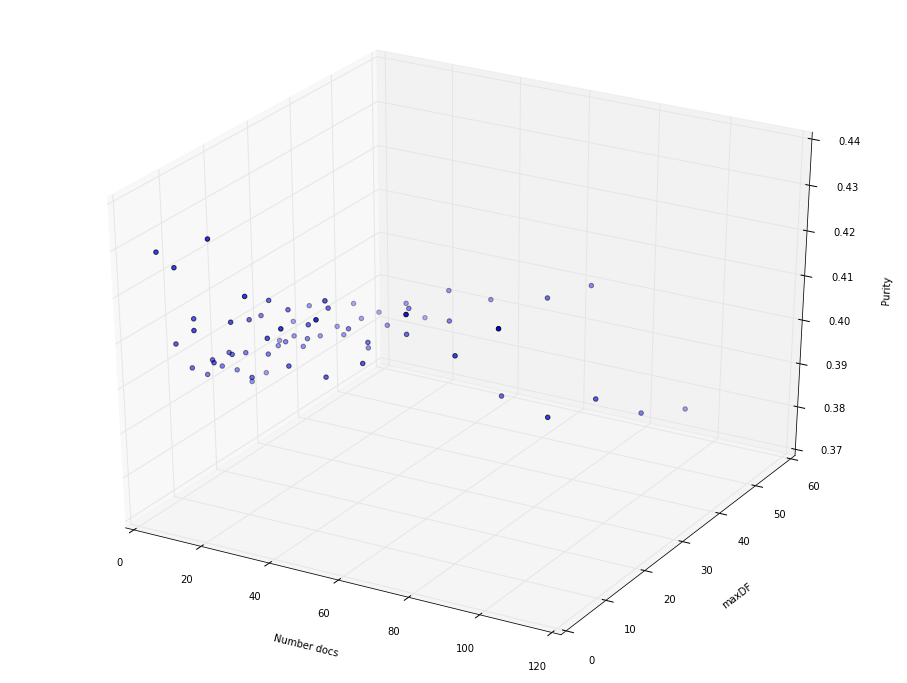

In [130]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = resulItera_II['nQuery'], resulItera_II['auxSigma'], resulItera_II['measure']
ax.scatter(X, Y, Z)
#cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('Number docs')
ax.set_ylabel('maxDF')
ax.set_zlabel('Purity')
plt.show()

### Clustering Word2Vec

In [ ]:
modelW2V = Word2Vec.load_word2vec_format('/home/jearevaloo/GoogleNews-vectors-negative300.bin', binary=True)
otherMatrix = makeWord2Vec(datKeyW.loc[:, "Titulos"], modelW2V)
print(otherMatrix.asformat)

In [ ]:
mpl.rcParams['figure.figsize'] = 16, 12
cosine1 = ComputeCosine(prueba.TCOR, "ResultsUN/cosinePrueba.pickle")
cosine2 = ComputeCosine(matrix = otherMatrix, pathScose = "ResultsUN/cosinePrueba_w2v.pickle")
#showMatrix(prueba.fit_tfidfOri, cosine1, titleDTR = "TCOR Representation")
showMatrix(prueba.fit_tfidfOri, cosine2, titleDTR = "Word2Vec Representation (Google News)")

In [ ]:
%matplotlib inline
pp_vc2 = resulCluster(matrixSimilarity = cosine2, DTR = otherMatrix, num_cluster = range(3, 21), ntime = 10, 
                      fileCluster = 'ResultsUN/ClusterResul_key.pickle')
import matplotlib as mpl
rcParams['figure.figsize'] = 16, 5
plotResul(pp_vc2, title = "Clustering Results word2Vec (Internal Evaluation)")
plotResul(pp_vc2, title = "Clustering Results word2Vec (External Evaluation)", flagInternal = False)

### Clustering Word2Vec(Scopus Size 200)

In [ ]:
modelW2V = Word2Vec.load_word2vec_format('../Word2Vec_Scopus/bckupW2Vec/modelW2Vec_200.bin', binary=True)
otherMatrix200    = makeWord2Vec(datKeyW.loc[:, "Titulos"], modelW2V, flagLower = True, tfidf = False)
otherMatrix200_tf = makeWord2Vec(datKeyW.loc[:, "Titulos"], modelW2V, flagLower = True, tfidf = True)
#print(otherMatrix200.asformat)

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 32, 32
cosine_scopu_w1 = ComputeCosine(otherMatrix200, "ResultsUN/cosinePrueba_w2v_scopus200_w1.pickle")
cosine_scopu_w2 = ComputeCosine(otherMatrix200_tf, "ResultsUN/cosinePrueba_w2v_scopus200_w2.pickle")
showMatrix(cosine_scopu_w1, cosine_scopu_w1,  cosen_other = cosine_scopu_w2, titleDTR = "Word2Vec Representation (Scopus - wt. 1)", 
           titleOther = "Word2Vec Representation (Scopus - wt. tf-idf)")

In [ ]:
%matplotlib inline
pp_w2v200_w2 = resulCluster(matrixSimilarity = cosine_scopu_w2, DTR = otherMatrix200, num_cluster = range(3, 26), ntime = 10, 
                            fileCluster = 'ResultsUN/ClusterResul_key_W2CSCOP_w2.pickle')
rcParams['figure.figsize'] = 16, 5
plotResul(pp_w2v200_w2, title = "Clustering Results word2Vec (Internal Evaluation)")
plotResul(pp_w2v200_w2, title = "Clustering Results word2Vec (External Evaluation)", flagInternal = False)

In [ ]:
%matplotlib inline
pp_w2v200_w1 = resulCluster(matrixSimilarity = cosine_scopu_w1, DTR = otherMatrix200, num_cluster = range(3, 26), ntime = 10, 
                            fileCluster = 'ResultsUN/ClusterResul_key_W2CSCOP_w1.pickle')
                           
rcParams['figure.figsize'] = 16, 5
plotResul(pp_w2v200_w1, title = "Clustering Results word2Vec (Internal Evaluation)")
plotResul(pp_w2v200_w1, title = "Clustering Results word2Vec (External Evaluation)", flagInternal = False)

In [ ]:
modelW2V = Word2Vec.load_word2vec_format('../Word2Vec_Scopus/bckupW2Vec/modelW2Vec_300.bin', binary=True)
otherMatrix300 = makeWord2Vec(datKeyW.loc[:, "Titulos"], modelW2V, flagLower = True, tfidf = True)
print(otherMatrix300.asformat)
cosine_scopu_w2_300 = ComputeCosine(otherMatrix300, "ResultsUN/cosinePrueba_w2v_scopus300.pickle")

In [36]:
%matplotlib inline
pp_w2v300_w2 = resulCluster(matrixSimilarity = cosine4, DTR = otherMatrix300, num_cluster = range(3, 21), ntime = 10, 
                            fileCluster = 'ResultsUN/ClusterResul_key_W3CSCOP_w2.pickle', 
                           listMethod = [cluster_texts_kernelKmeans])
plotResul(pp_w2v300_w2, title = "Clustering Results word2Vec (Internal Evaluation)")
plotResul(pp_w2v300_w2, title = "Clustering Results word2Vec (External Evaluation)", flagInternal = False)

- evaluado para el metodo =  cluster_texts_kernelKmeans
Converged at iteration 7
Converged at iteration 7
Converged at iteration 7
Converged at iteration 7
Converged at iteration 7
Converged at iteration 12
Converged at iteration 12
Converged at iteration 12
Converged at iteration 12
Converged at iteration 12
Converged at iteration 58
Converged at iteration 58
Converged at iteration 58
Converged at iteration 58
Converged at iteration 58
Converged at iteration 20
Converged at iteration 20
Converged at iteration 20
Converged at iteration 20
Converged at iteration 20
Converged at iteration 15
Converged at iteration 15
Converged at iteration 15
Converged at iteration 15
Converged at iteration 15
Converged at iteration 20
Converged at iteration 20
Converged at iteration 20
Converged at iteration 20
Converged at iteration 20
Converged at iteration 32
Converged at iteration 32
Converged at iteration 32
Converged at iteration 32
Converged at iteration 32
Converged at iteration 17
Converged at 

ValueError: Empty cluster found, try smaller n_cluster.

Title No --0--
Title No --100--
Title No --200--
Title No --300--
Title No --400--
Title No --500--
Title No --600--
Title No --700--
Title No --800--
Title No --900--
Title No --1000--
Title No --1100--
Title No --1200--
Title No --1300--
Title No --1400--
Title No --1500--
Title No --1600--
Termns not found :986 (6.36)
<bound method csr_matrix.asformat of <1662x500 sparse matrix of type '<type 'numpy.float64'>'
	with 831000 stored elements in Compressed Sparse Row format>>
--- Save cosine similarity



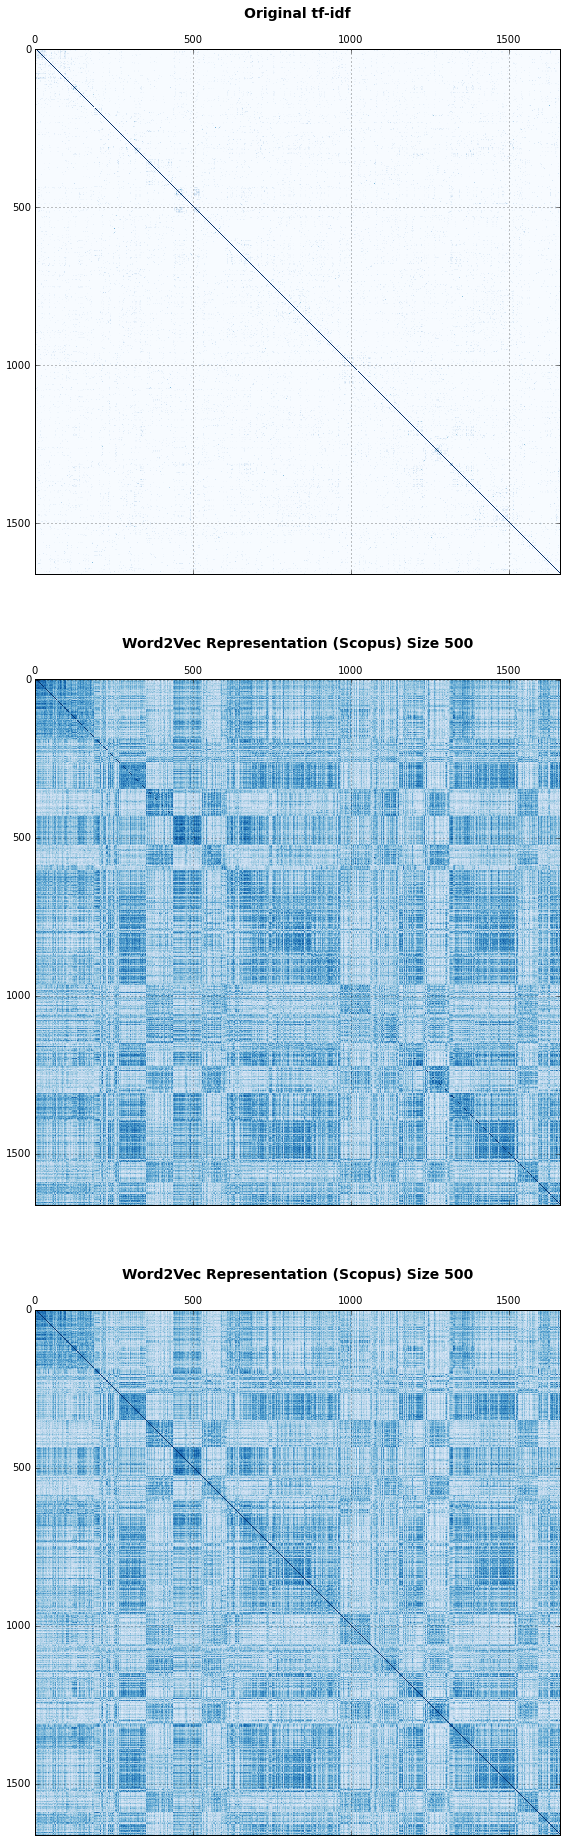

In [171]:
modelW2V = Word2Vec.load_word2vec_format('../Word2Vec_Scopus/bckupW2Vec/model500_II.bin', binary=True)
otherMatrix500 = makeWord2Vec(datKeyW.loc[:, "Titulos"], modelW2V, flagLower = True)
print(otherMatrix500.asformat)
cosine5 = ComputeCosine(otherMatrix500, "ResultsUN/cosinePrueba_w2v_scopus500.pickle")
showMatrix(prueba.fit_tfidfOri, cosine4, cosine5, titleDTR = "Word2Vec Representation (Scopus) Size 500", 
           titleOther = "Word2Vec Representation (Scopus) Size 500")

In [177]:
%matplotlib inline
pp_vc2_S500 = resulCluster(matrixSimilarity = cosine5, DTR = otherMatrix500, num_cluster = range(3, 21), ntime = 10, 
                           fileCluster = 'ResultsUN/ClusterResul_key_W5CSCOP.pickle', 
                           listMethod = [cluster_texts_kernelKmeans])
rcParams['figure.figsize'] = 16, 5
plotResul(pp_vc2_S500, title = "Clustering Results word2Vec (Internal Evaluation)")
plotResul(pp_vc2_S500, title = "Clustering Results word2Vec (External Evaluation)", flagInternal = False)

- evaluado para el metodo =  cluster_texts_kernelKmeans
Converged at iteration 6
Converged at iteration 6
Converged at iteration 6
Converged at iteration 6
Converged at iterationConverged at iterationConverged at iterationConverged at iteration 6
 6
 6
 6
Converged at iterationConverged at iteration 6
 6
Converged at iteration 12
Converged at iteration 12
Converged at iteration 12
Converged at iteration 12
Converged at iterationConverged at iterationConverged at iterationConverged at iteration 12
 12
 12
 12
Converged at iterationConverged at iteration 12
 12
Converged at iteration 20
Converged at iteration 20
Converged at iteration 20
Converged at iteration 20
Converged at iterationConverged at iterationConverged at iterationConverged at iteration 20
 20
 20
 20
Converged at iterationConverged at iteration 20
 20
Converged at iteration 11
Converged at iteration 11
Converged at iteration 11
Converged at iteration 11
Converged at iterationConverged at iterationConverged at iterationConv

ValueError: Empty cluster found, try smaller n_cluster.

### Clustering Word2Vec (Scopus 1MILL)

In [7]:
modelW2V    = Word2Vec.load_word2vec_format('../Word2Vec_Scopus/bckupW2Vec/modelW2Vec_200.bin', binary=True)
modelW2V_II = Word2Vec.load_word2vec_format('../Word2Vec_Scopus/bckupW2Vec/modelW2Vec_200_II.bin', binary=True)
otherMatrix200    = makeWord2Vec(datKeyW.loc[:, "Titulos"], modelW2V, flagLower = True, tfidf = False)
otherMatrix200_II = makeWord2Vec(datKeyW.loc[:, "Titulos"], modelW2V_II, flagLower = True, tfidf = False)

Title No --0--
Title No --100--
Title No --200--
Title No --300--
Title No --400--
Title No --500--
Title No --600--
Title No --700--
Title No --800--
Title No --900--
Title No --1000--
Title No --1100--
Title No --1200--
Title No --1300--
Title No --1400--
Title No --1500--
Title No --1600--
Termns not found :978 (6.31)
Title No --0--
Title No --100--
Title No --200--
Title No --300--
Title No --400--
Title No --500--
Title No --600--
Title No --700--
Title No --800--
Title No --900--
Title No --1000--
Title No --1100--
Title No --1200--
Title No --1300--
Title No --1400--
Title No --1500--
Title No --1600--
Termns not found :802 (5.17)


--- Load cosine similarity



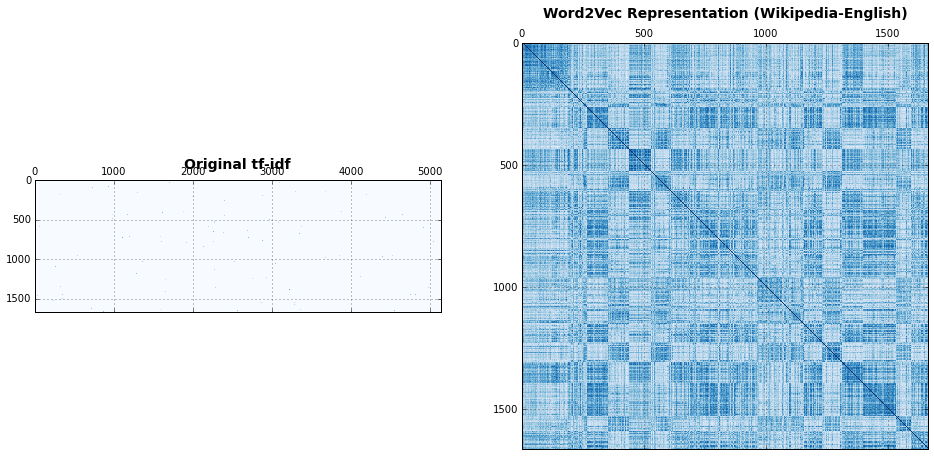

In [8]:
%matplotlib inline
cosine_S2D200 = ComputeCosine(otherMatrix200_II, "ResultsUN/cosinePrueba_w2v_scopusII200.pickle")
rcParams['figure.figsize'] = 16, 12
showMatrix(prueba.fit_tfidfOri, cosine_S2D200, titleDTR = "Word2Vec Representation (Wikipedia-English)", 
           titleOther = "Word2Vec Representation (Wikipedia-English)")

In [ ]:
def runExperimentWord2Vec(file, num_cluster, labels, ntime = 10):
    print("Trabajando Con:", '../Word2Vec_Scopus/bckupW2Vec/' + file, '\n')
    modelW2V    = Word2Vec.load_word2vec_format('../Word2Vec_Scopus/bckupW2Vec/' + file, binary=True)
    otherMatrix = makeWord2Vec(datKeyW.loc[:, "Titulos"], modelW2V, flagLower = True, tfidf = True)
    fileCos     = re.sub("\\.bin", ".pickle", file)
    cosine_W2V  = ComputeCosine(otherMatrix, "cosinePrueba" + fileCos)
    pp_vc2 = resulCluster(matrixSimilarity = cosine_W2V, DTR = otherMatrix, num_cluster = num_cluster, 
                          ntime = ntime, labels = labels, fileCluster = 'ClusterResul' + fileCos)
    rcParams['figure.figsize'] = 16, 5
    plotResul(pp_vc2, title = "Clustering Results word2Vec (Internal Evaluation)")
    plotResul(pp_vc2, title = "Clustering Results word2Vec (External Evaluation)", flagInternal = False)

runExperimentWord2Vec('modelW2Vec_200.bin', range(3, 30), datKeyW['Categoria'])
runExperimentWord2Vec('modelW2Vec_200_II.bin', range(3, 30), datKeyW['Categoria'])

('Trabajando Con:', '../Word2Vec_Scopus/bckupW2Vec/modelW2Vec_200.bin', '\n')
Title No --0--
Title No --100--
Title No --200--
Title No --300--
Title No --400--
Title No --500--
Title No --600--
Title No --700--
Title No --800--
Title No --900--
Title No --1000--
Title No --1100--
Title No --1200--
Title No --1300--
Title No --1400--
Title No --1500--
Title No --1600--
Termns not found :978 (6.31)
--- Save cosine similarity

- evaluado para el metodo =  cluster_texts_spectral


In [ ]:
runExperimentWord2Vec('modelW2Vec_300.bin', range(3, 30), datKeyW['Categoria'])

In [ ]:
runExperimentWord2Vec('modelW2Vec_300_II.bin', range(3, 30), datKeyW['Categoria'])

In [ ]:
runExperimentWord2Vec('modelW2Vec_500.bin', range(3, 30), datKeyW['Categoria'])

In [ ]:
runExperimentWord2Vec('modelW2Vec_500_II.bin', range(3, 30), datKeyW['Categoria'])

In [6]:
os.listdir("../Word2Vec_Scopus/bckupW2Vec")

['modelW2Vec_500_II.bin',
 'modelW2Vec_300_II.bin',
 'modelW2Vec_200_II.bin',
 'model200_II.bin',
 'modelW2Vec_200.bin',
 'modelW2Vec_300.bin',
 'modelW2Vec_1000.bin',
 'en.model.syn1.npy',
 'model500_II.bin',
 'en.model',
 'en.model.syn0.npy',
 'modelW2Vec_500.bin',
 'model300_II.bin']

### Clustering Word2Vec (Wikipedia-English)

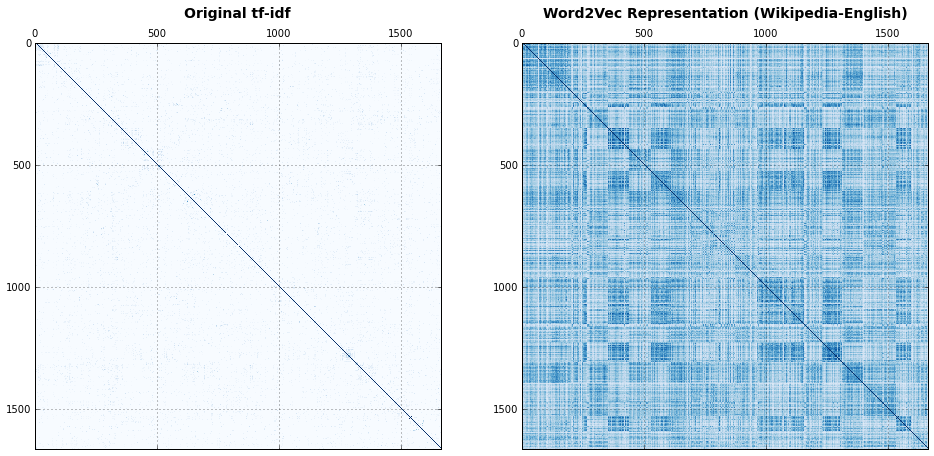

In [38]:
modelW2V        = Word2Vec.load('../Word2Vec_Scopus/bckupW2Vec/en.model')
otherMatrixWiki = makeWord2Vec(datKeyW.loc[:, "Titulos"], modelW2V)
print(otherMatrixWiki.asformat)
cosineWiki = ComputeCosine(otherMatrixWiki, "ResultsUN/cosinePrueba_w2v_wiki1000.pickle")
rcParams['figure.figsize'] = 16, 12
showMatrix(prueba.fit_tfidfOri, cosineWiki, titleDTR = "Word2Vec Representation (Wikipedia-English)", 
           titleOther = "Word2Vec Representation (Wikipedia-English)")

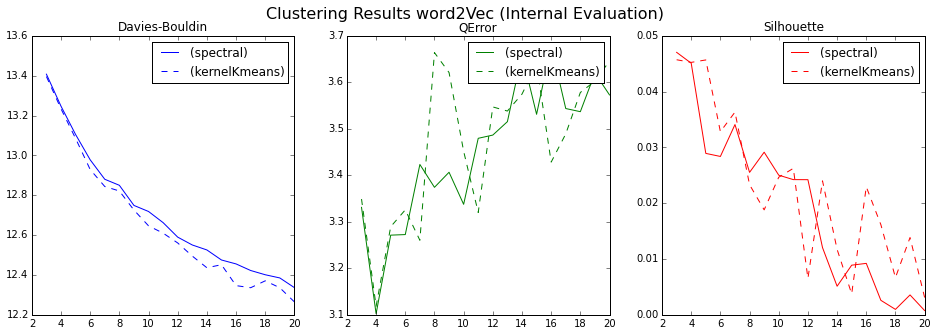

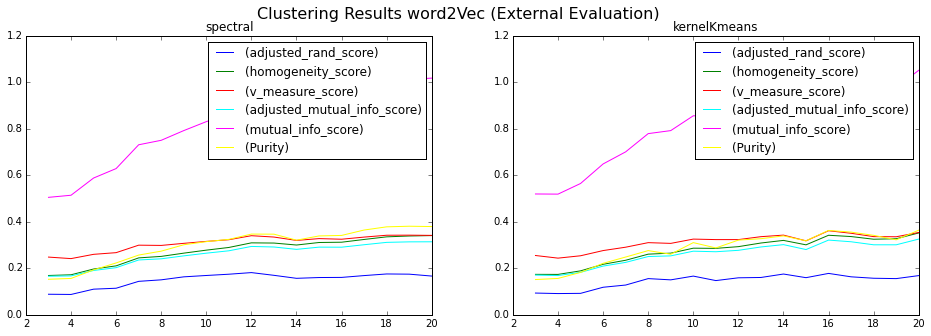

In [30]:
%matplotlib inline
pp_vc2_wiki = resulCluster(matrixSimilarity = cosineWiki, DTR = otherMatrixWiki, num_cluster = range(3, 21), ntime = 10, 
                           fileCluster = 'ResultsUN/ClusterResul_key_wiki1000.pickle')
rcParams['figure.figsize'] = 16, 5
plotResul(pp_vc2_wiki, title = "Clustering Results word2Vec (Internal Evaluation)")
plotResul(pp_vc2_wiki, title = "Clustering Results word2Vec (External Evaluation)", flagInternal = False)

In [33]:
resulTable = tabResum([pp_tfidf, pp_dtr, pp_vc2, pp_vc2_S200, pp_vc2_wiki], ['TF-IDF', 'TCOR','Word2Vec -GoogleNews', 
                                                                             'Word2VecSCOP-200', 
                                                                             'Word2VecWiki-1000'], 20).transpose()
resulTable.columns = [re.sub("_", " ", ww) for ww in resulTable.columns]
resulTable

Davies-Bouldin    QError  Silhouette  \
Spectral(TF-IDF)                          0.974324  7.512857    0.009858   
Kernelkmeans(TF-IDF)                      0.979477  9.703712    0.006716   
Spectral(TCOR)                            0.286816  3.959682   -0.043127   
Kernelkmeans(TCOR)                        0.288319  4.352176   -0.029194   
Spectral(Word2Vec -GoogleNews)            3.033457  4.126780    0.013956   
Kernelkmeans(Word2Vec -GoogleNews)        3.006008  4.025107   -0.015383   
Kernelkmeans(Word2VecSCOP-200)            3.268994  2.815140   -0.075324   
Spectral(Word2VecWiki-1000)              12.336306  3.572847    0.000759   
Kernelkmeans(Word2VecWiki-1000)          12.264679  3.645828    0.003100   

                                    adjusted rand score  homogeneity score  \
Spectral(TF-IDF)                               0.046357           0.206588   
Kernelkmeans(TF-IDF)                           0.063564           0.175547   
Spectral(TCOR)                                 0.183423           0.379546   
Kernelkmeans(TCOR)                             0.193972           0.365982   
Spectral(Word2Vec -GoogleNews)                 0.146629           0.305391   
Kernelkmeans(Word2Vec -GoogleNews)             0.147829           0.318835   
Kernelkmeans(Word2VecSCOP-200)                 0.202942           0.384537   
Spectral(Word2VecWiki-1000)                    0.166611           0.340747   
Kernelkmeans(Word2VecWiki-1000)                0.168607           0.351997   

                                    v measure score  \
Spectral(TF-IDF)                           0.222534   
Kernelkmeans(TF-IDF)                       0.177177   
Spectral(TCOR)                             0.389549   
Kernelkmeans(TCOR)                         0.384087   
Spectral(Word2Vec -GoogleNews)             0.306042   
Kernelkmeans(Word2Vec -GoogleNews)         0.322269   
Kernelkmeans(Word2VecSCOP-200)             0.397519   
Spectral(Word2VecWiki-1000)                0.341561   
Kernelkmeans(Word2VecWiki-1000)            0.354127   

                                    adjusted mutual info score  \
Spectral(TF-IDF)                                      0.173731   
Kernelkmeans(TF-IDF)                                  0.141893   
Spectral(TCOR)                                        0.354907   
Kernelkmeans(TCOR)                                    0.340777   
Spectral(Word2Vec -GoogleNews)                        0.277259   
Kernelkmeans(Word2Vec -GoogleNews)                    0.291671   
Kernelkmeans(Word2VecSCOP-200)                        0.361866   
Spectral(Word2VecWiki-1000)                           0.314035   
Kernelkmeans(Word2VecWiki-1000)                       0.325651   

                                    mutual info score    Purity  
Spectral(TF-IDF)                             0.617206  0.253430  
Kernelkmeans(TF-IDF)                         0.524469  0.237665  
Spectral(TCOR)                               1.133939  0.394705  
Kernelkmeans(TCOR)                           1.093414  0.372443  
Spectral(Word2Vec -GoogleNews)               0.912391  0.327196  
Kernelkmeans(Word2Vec -GoogleNews)           0.952559  0.318291  
Kernelkmeans(Word2VecSCOP-200)               1.148850  0.379663  
Spectral(Word2VecWiki-1000)                  1.018021  0.379543  
Kernelkmeans(Word2VecWiki-1000)              1.051633  0.364019